<img src = "https://machinelearningmastery.com/wp-content/uploads/2014/12/naive-bayes-classifier.jpg" width=50%>

- [ ] What is Naive Bayes?
- [ ] Social Media ADs Dataset
- [ ] Label Encoding with Sklearn
- [ ] Feature Scaling with Sklearn
- [ ] Training the model
- [ ] Model Evaluation

## What is Naive Bayes?

Naive Bayes is a **classification** algorithm that works based on the Bayes theorem. Before explaining about Naive Bayes, first, we should discuss Bayes Theorem. Bayes theorem is used to find the probability of a hypothesis with given evidence.

<img src = "https://editor.analyticsvidhya.com/uploads/34725nv1.png" width=50%>

In this, using Bayes theorem we can find the probability of A, given that B occurred.

> A is the hypothesis and B is the evidence.

> P(B|A) is the probability of B given that A is True.

> P(A) and P(B) is the independent probabilities of A and B.

<img src = "https://editor.analyticsvidhya.com/uploads/30337nv.png" width=50%>

## The concept behind the algorithm

Let’s understand the concept of the Naive Bayes Theorem through an example. We are taking a dataset of employees in a company, our aim is to create a model to find whether a person is going to the office by driving or walking using salary and age of the person.

<img src = "https://editor.analyticsvidhya.com/uploads/75704nv3.png" width=50%>

* Note that we are taken age on the X-axis and Salary on the Y-axis.

In the above, we can see 30 data points in which red points belong to those who are walking and green belongs to those who are driving.

<img src = "https://editor.analyticsvidhya.com/uploads/60483nv4.png" width=50%>

Now let’s add a new data point into it. Our aim is to find the category that the new point belongs to.

<img src = "https://editor.analyticsvidhya.com/uploads/67866nv5.png" width=50%>

In [18]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

<img src = "https://www.discoveryad.hk/images/facebook_ads_instagram_ads.jpg" width=50%>

- [x] What is Naive Bayes?
- [ ] Social Media ADs Dataset
- [ ] Label Encoding with Sklearn
- [ ] Feature Scaling with Sklearn
- [ ] Training the model
- [ ] Model Evaluation

We are using the Social network ad dataset. The dataset contains the details of users in a social networking site to find whether a user buys a product by clicking the ad on the site based on their salary, age, and gender.

In [19]:
df = pd.read_csv('Social_Network_Ads.csv')

In [20]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [22]:
pd.crosstab(df.Gender,df.Purchased)

Purchased,0,1
Gender,,
Female,127,77
Male,130,66


In [23]:
df['Gender'].value_counts()

,count
Gender,
Female,204
Male,196


In [24]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


| Question      |Answer
| :---        |    :----:   
| Number of Instances      | 400       
| Number of Features   | 3
| Class Distribution      | 257 No, 143 Yes
| Number of Missing Values      | 0       
| Number of Classes      | 2       
| Task   | Classification

## X,y Seletction from dataframe

In [25]:
X = df.iloc[:, [1, 2, 3]]
y = df.iloc[:, -1]

In [26]:
X

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


In [27]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


- [x] What is Naive Bayes?
- [x] Social Media ADs Dataset
- [ ] Label Encoding with Sklearn
- [ ] Feature Scaling with Sklearn
- [ ] Training the model
- [ ] Model Evaluation

## LabelEncoder

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])

In [29]:
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

- [x] What is Naive Bayes?
- [x] Social Media ADs Dataset
- [x] Label Encoding with Sklearn
- [ ] Feature Scaling with Sklearn
- [ ] Training the model
- [ ] Model Evaluation

## Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
X_train[0]

array([1.02532046, 1.92295008, 2.14601566])

array([1.02532046, 1.92295008, 2.14601566])

- [x] What is Naive Bayes?
- [x] Social Media ADs Dataset
- [x] Label Encoding with Sklearn
- [x] Feature Scaling with Sklearn
- [ ] Training the model
- [ ] Model Evaluation

## Training Model

In [33]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [34]:
y_pred  =  classifier.predict(X_test)

In [35]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

- [x] What is Naive Bayes?
- [x] Social Media ADs Dataset
- [x] Label Encoding with Sklearn
- [x] Feature Scaling with Sklearn
- [x] Training the model
- [ ] Model Evaluation

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56  2]
 [ 4 18]]


<Axes: >

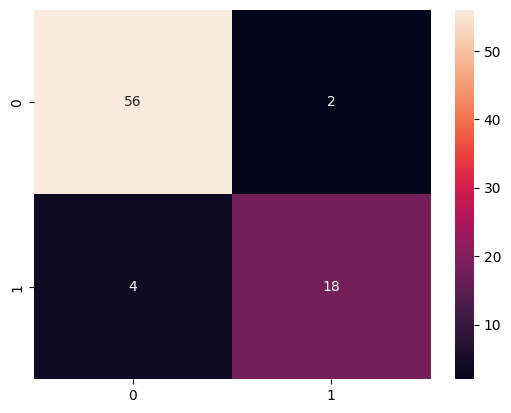

In [37]:
sns.heatmap(cm,annot=True)

In [38]:
ac = accuracy_score(y_test,y_pred)
ac

0.925